In [23]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras.preprocessing.image as KPImage
import sklearn.model_selection as skmodselect
from keras.src.callbacks import EarlyStopping
from keras.src.legacy.preprocessing.image import ImageDataGenerator

In [40]:
#This dataset is taken from the Kaggle Plant Pathology 2021 - FGVC8 Competition found at https://www.kaggle.com/competitions/plant-pathology-2021-fgvc8/overview
# The problem at the heart of this competition is to create a model that is able to label apple leaves as healthy or infected with a foliar disease. 

#The first step is to load the training labels as a pandas dataframe
train_df = pd.read_csv("data/train.csv")

In [41]:
#From the first five rows, it is clear that there is one features for this dataset. The one feature is the id for the image that the label is associated with. However, the training images are in the train directory and so have to be loaded.
train_df.head()

,image,labels
0,800113bb65efe69e.jpg,healthy
1,8002cb321f8bfcdf.jpg,scab frog_eye_leaf_spot complex
2,80070f7fb5e2ccaa.jpg,scab
3,80077517781fb94f.jpg,scab
4,800cbf0ff87721f8.jpg,complex


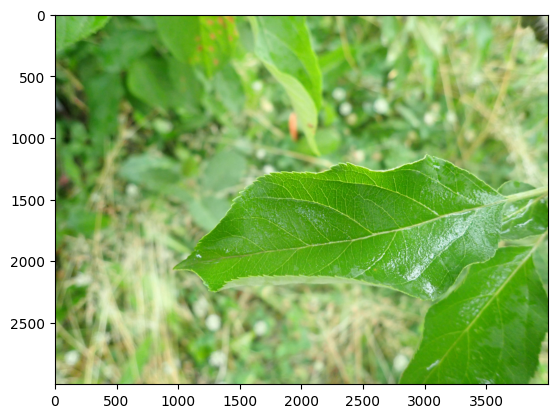

In [26]:
#Next we sample one image with healthy leaves and one with infected leaves
healthy_image = plt.imread("data/train_images/800edef467d27c15.jpg")
healthy = plt.imshow(healthy_image)
plt.show()

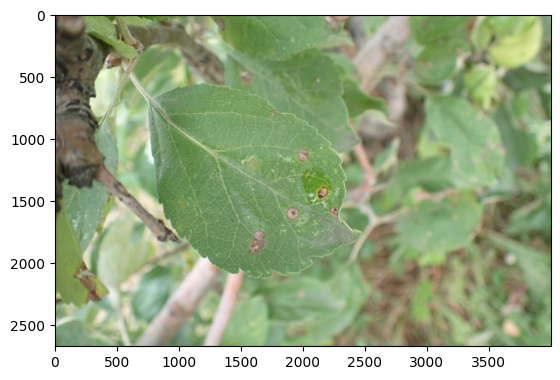

In [27]:
infected_images = plt.imread("data/train_images/8002cb321f8bfcdf.jpg")
infected = plt.imshow(infected_images)
plt.show()

In [31]:
#The next step is to create a dictionary mapping the image_id with the actual images of the training set. At the same time a list keeps track of any images that don't load or don't exist. Because the training set has 220k records I decided to take a subset to reduce memory costs
image_loader = KPImage.ImageDataGenerator(rescale=1./255)
pic_generator = image_loader.flow_from_directory(directory="data",target_size=(400,260),batch_size=50)

Found 18635 images belonging to 2 classes.


(array([14008.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  4624.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

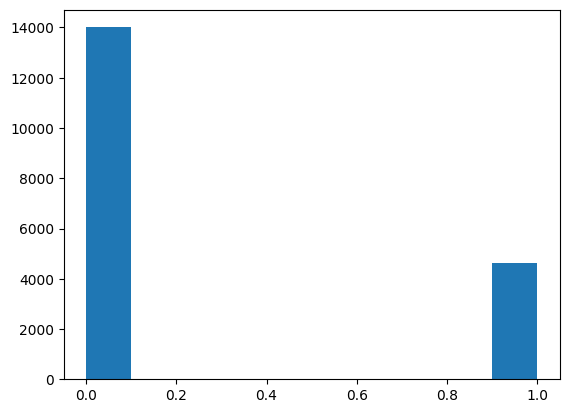

In [42]:
#I then plot the distribution of the labels and then split the data into training and validation sets inorder to compare performance on different models
#plt.hist(train_df.label)
train_df.labels = np.array([1 if train_df.labels[i]=="healthy" else 0 for i in range(len(train_df.labels))])
plt.hist(train_df.labels)


In [33]:
#I will try to use VGG-11 and VGG-13 for the model architecture. VGG is a good model for image classification and I chose VGG-11/VGG-13 because I wanted to balance performance and accuracy.


In [48]:
VGG_11_model = tf.keras.models.Sequential()
VGG_11_model.add(tf.keras.layers.Conv2D(input_shape=(400,260,3),filters=64,padding="same",activation="relu",kernel_size=(3,3)))
VGG_11_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
VGG_11_model.add(tf.keras.layers.Conv2D(filters=128,padding="same",activation="relu",kernel_size=(3,3)))
VGG_11_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
VGG_11_model.add(tf.keras.layers.Conv2D(filters=256,padding="same",activation="relu",kernel_size=(3,3)))
VGG_11_model.add(tf.keras.layers.Conv2D(filters=256,padding="same",activation="relu",kernel_size=(3,3)))
VGG_11_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
VGG_11_model.add(tf.keras.layers.Conv2D(filters=512,padding="same",activation="relu",kernel_size=(3,3)))
VGG_11_model.add(tf.keras.layers.Conv2D(filters=512,padding="same",activation="relu",kernel_size=(3,3)))
VGG_11_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
VGG_11_model.add(tf.keras.layers.Conv2D(filters=512,padding="same",activation="relu",kernel_size=(3,3)))
VGG_11_model.add(tf.keras.layers.Conv2D(filters=512,padding="same",activation="relu",kernel_size=(3,3)))
VGG_11_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
VGG_11_model.add(tf.keras.layers.Flatten())
VGG_11_model.add(tf.keras.layers.Dense(units=4096,activation="relu"))
VGG_11_model.add(tf.keras.layers.Dense(units=4096,activation="relu"))
VGG_11_model.add(tf.keras.layers.Dense(units=2,activation="sigmoid"))
VGG_11_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['F1Score'])

C:\Users\rrr35\PycharmProjects\kaggle-submissions\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
VGG_13_model = tf.keras.models.Sequential()
VGG_13_model.add(tf.keras.layers.Conv2D(input_shape=(400,260,3),filters=64,padding="same",activation="relu",kernel_size=(3,3)))
VGG_13_model.add(tf.keras.layers.Conv2D(filters=64,padding="same",activation="relu",kernel_size=(3,3)))
VGG_13_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
VGG_13_model.add(tf.keras.layers.Conv2D(filters=128,padding="same",activation="relu",kernel_size=(3,3)))
VGG_13_model.add(tf.keras.layers.Conv2D(filters=128,padding="same",activation="relu",kernel_size=(3,3)))
VGG_13_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
VGG_13_model.add(tf.keras.layers.Conv2D(filters=256,padding="same",activation="relu",kernel_size=(3,3)))
VGG_13_model.add(tf.keras.layers.Conv2D(filters=256,padding="same",activation="relu",kernel_size=(3,3)))
VGG_13_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
VGG_13_model.add(tf.keras.layers.Conv2D(filters=512,padding="same",activation="relu",kernel_size=(3,3)))
VGG_13_model.add(tf.keras.layers.Conv2D(filters=512,padding="same",activation="relu",kernel_size=(3,3)))
VGG_13_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
VGG_13_model.add(tf.keras.layers.Conv2D(filters=512,padding="same",activation="relu",kernel_size=(3,3)))
VGG_13_model.add(tf.keras.layers.Conv2D(filters=512,padding="same",activation="relu",kernel_size=(3,3)))
VGG_13_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
VGG_13_model.add(tf.keras.layers.Flatten())
VGG_13_model.add(tf.keras.layers.Dense(units=4096,activation="relu"))
VGG_13_model.add(tf.keras.layers.Dense(units=4096,activation="relu"))
VGG_13_model.add(tf.keras.layers.Dense(units=2,activation="sigmoid"))
VGG_13_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['F1Score'])

C:\Users\rrr35\PycharmProjects\kaggle-submissions\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
#Get the summary for the VGG 11 model
VGG_11_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)              │ (None, 400, 260, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 200, 130, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 200, 130, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 100, 65, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 100, 65, 256)   │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 100, 65, 256)   │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 50, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 50, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 50, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 25, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 25, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 25, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 12, 8, 512)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4096)           │   201,330,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 227,340,674 (867.24 MB)

 Trainable params: 227,340,674 (867.24 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
#Get the summary for the VGG 13 model
VGG_13_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_34 (Conv2D)              │ (None, 400, 260, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 400, 260, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 200, 130, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 200, 130, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 200, 130, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 100, 65, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 100, 65, 256)   │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 100, 65, 256)   │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 50, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 50, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 50, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 25, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 25, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 25, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 12, 8, 512)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4096)           │   201,330,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 227,525,186 (867.94 MB)

 Trainable params: 227,525,186 (867.94 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
VGG_11_model.fit(pic_generator,batch_size=50,epochs=150,verbose=1,callbacks=[EarlyStopping(monitor='val_loss')])

Epoch 1/150


C:\Users\rrr35\PycharmProjects\kaggle-submissions\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


182/373 ━━━━━━━━━━━━━━━━━━━━ 44:01 14s/step - F1Score: 0.4976 - loss: 1092.1791

KeyboardInterrupt: 

In [ ]:
#Citations: Thapa, Ranjita; Zhang, Kai; Snavely, Noah; Belongie, Serge; Khan, Awais. (2021). Plant Pathology 2021 - FGVC8 . Kaggle. https://kaggle.com/competitions/plant-pathology-2021-fgvc8